# Table of Contents

1. Understanding Business Case
2. Data Understanding
3. Data Cleaning
4. Data Visualization
5. Data preprocessing
6. Building models & Evaluation
7. Model prediction

# 1. Introduction - Loan Default Prediction

The loan approval process is  a  challenging task for any financial institution. Before  giving credit loans to borrowers, the bank decides whether the borrower is bad (defaulter) or good (non-defaulter). This project focuses on developing  Machine  Learning  (ML)  models  to  predict  loan eligibility,  which  is  vital  in  accelerating  the  decision-making process and  determining if  an  applicant  gets  a  loan  or  not. 

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

The dataset used in this project is the historical dataset 'Loan Eligible Dataset,' available on [Kaggle](https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset).



The dataset consists of the following variables:

- Loan_ID : Unique Loan ID
- Gender : Male/ Female
- Married : Applicant married (Y/N)
- Dependents : Number of dependents 
- Education : Applicant Education (Graduate/ Under Graduate)
- Self_Employed : Self employed (Y/N)
- ApplicantIncome : Applicant income
- CoapplicantIncome : Coapplicant income
- LoanAmount : Loan amount in thousands of dollars
- Loan_Amount_Term : Term of loan in months
- Credit_History : credit history meets guidelines yes or no
- Property_Area : Urban/ Semi Urban/ Rural
- Loan_Status : Loan approved (Y/N) this is the target variable

This is a classification problem in which we need to classify whether the loan will be approved or not. Loan status can have two values: Yes or NO.

Yes: if the loan is approved

No: if the loan is not approved

## Objective of the project

- Analyze customer data provided in data set (EDA)
- Build various ML models that can predict loan approval

## The ML models used in the project

- Logistic Regression
- K-Nearest Neighbour (KNN)
- Support Vector Machine (SVM)
- Naive Bayes
- Decision Tree
- Random Forest
- Gradient Boost

# 2. Data Understanding

To solve this problem, we have three CSV files: train, test, and sample submission.

- Train file will be used for training the model.It contains all the independent variables and the target variable.
- Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.
- Sample submission file contains the format in which we have to submit out predictions

In [1]:
#import the necessary libraries 
import pandas as pd #data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt #data plot
%matplotlib inline 
import seaborn as sns #data plot
import warnings
warnings.filterwarnings("ignore") #ignore warning

In [2]:
# load and read the dataset
loan_train = pd.read_csv("C://Users//Vimoney//Downloads//loan-train.csv")
loan_test = pd.read_csv("C://Users//Vimoney//Downloads//loan-test.csv")

In [3]:
#Lets display the some few information from our large datasets
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
#Check the size of train/test dataset
print("The size of train dataset is: ", loan_train.shape)
print("The size of test dataset is: ", loan_test.shape)


The size of train dataset is:  (614, 13)
The size of test dataset is:  (367, 12)


We have 12 independent variables and 1 target variable (Loan_Status) in the training dataset.
We have similar features in the test dataset as the training dataset except for the Loan_Status. 
We need to predict the test dataset using the training dataset. 

In [6]:
# check the data types of variable in the dataset. 
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are 3 data formats in the dataset including: 
- object: Object format mentions categorical variables. Categorical variables in this dataset are Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status, Credit_History. 
- int64: int64 format mentions the integer variables. In this dataset, only ApplicantIncome is int64 format
- float64: It represents the variable that has some decimal values involved. CoapplicantIncome, LoanAmount, Loan_Amount_Term  belong to this format.

Besides data format, these variables can be divided into different types: 
- Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
- Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
- Numerical features: These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)

# 3. Data Cleaning/Data Preprocessing

**Drop unwanted columns**

Loan_ID doesnt bring any values for modeling and prediction, therefore, we will drop it from both train and test dataset. 

In [7]:
loan_train.drop(['Loan_ID'],axis=1,inplace=True) # Delete Loan_ID from training dataset 
loan_test.drop(['Loan_ID'],axis=1,inplace=True) # Delete Loan_ID from test dataset 

**Identify missing values**

We are going to be checking if there are NULL values present in our data. We see that there are quite a few null values present.

In [8]:
loan_train.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
loan_test.isna().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

**Imputing missing values in train and test**

As we can see here, there are many columns missing with small amount of null values so we use mean amd mode to replace with NaN values.
- For categorical variables, we will replace NaN values with mode. This can apply with Credit_History,Self_Employed, Gender, Dependents, Married. 
- For numerical variables, we will replace NaN values with mean. This can apply with LoanAmount, Loan_Amount_Term  

In [10]:
#Fill nan values of categorical variables. 
loan_train["Gender"].fillna(loan_train["Gender"].mode()[0], inplace=True)
loan_test["Gender"].fillna(loan_test["Gender"].mode()[0], inplace=True)
loan_train["Married"].fillna(loan_train["Married"].mode()[0], inplace=True)

loan_train["Dependents"].fillna(loan_train["Dependents"].mode()[0], inplace=True)
loan_test["Dependents"].fillna(loan_test["Dependents"].mode()[0], inplace=True)
loan_train["Self_Employed"].fillna(loan_train["Self_Employed"].mode()[0], inplace=True)
loan_test["Self_Employed"].fillna(loan_test["Self_Employed"].mode()[0], inplace=True)
loan_train["Credit_History"].fillna(loan_train["Credit_History"].mode()[0], inplace=True)
loan_test["Credit_History"].fillna(loan_test["Credit_History"].mode()[0], inplace=True)

In [11]:
#Fill nan values of numeric variables. 
loan_train["LoanAmount"].fillna(loan_train["LoanAmount"].median(), inplace=True)
loan_test["LoanAmount"].fillna(loan_test["LoanAmount"].median(), inplace=True)
loan_train["Loan_Amount_Term"].fillna(loan_train["Loan_Amount_Term"].median(), inplace=True)
loan_test["Loan_Amount_Term"].fillna(loan_test["Loan_Amount_Term"].median(), inplace=True)

In [12]:
#let's check null values again
loan_train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
loan_test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**General understanding of dataset using describe()**

In [14]:
loan_train.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [15]:
loan_test.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,367,367,367,367,367.000000,367.000000,367.000000,367.000000,367.000000,367
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,297,233,210,283,330,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,135.980926,342.822888,0.839237,NaN
std,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,60.959739,64.658402,0.367814,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,101.000000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,157.500000,360.000000,1.000000,NaN


We can perform some **feature engineering** to combine or derive new features. For this dataset, I will create a new feature called Total Income combining the ApplicantIncome and CoapplicantIncome because some people might have a low income but strong CoappliantIncome so a good idea is to combine them. 

In [21]:
loan_train["Total Income"]= loan_train["ApplicantIncome"] + loan_train["CoapplicantIncome"]
loan_test["Total Income"]= loan_test["ApplicantIncome"] + loan_test["CoapplicantIncome"]
loan_train["Total Income"].head()

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: Total Income, dtype: float64

And now I will add a new column from Loan_Status into nemeric format in training set to make convenience for visualization in the next part. 

In [23]:
loan_train["Loan Status"] = loan_train["Loan_Status"].replace({"Y": 1, "N": 0})
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income,Loan Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,1


# 4. Explanatory data analysis (EDA)

## Univariate Analysis

 Now let’s visualize the data

In [16]:
loan_train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

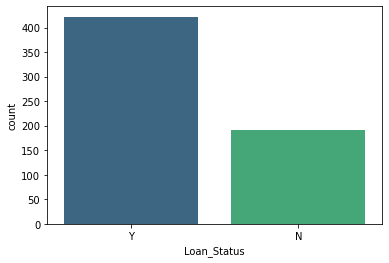

In [17]:
sns.countplot(x="Loan_Status", data=loan_train, palette="viridis")
plt.show()

Taking a look at the countplot, we get an understanding that most of the target variable in training dataset is loan approval. More than 68% are loan approval and nearly 32% of them are loan disapproval.  Therefore, we are dealing with an imbalanced dataset, and care must be taken when using various machine learning models for predictions.

**Univariate Analysis for categorical variables**

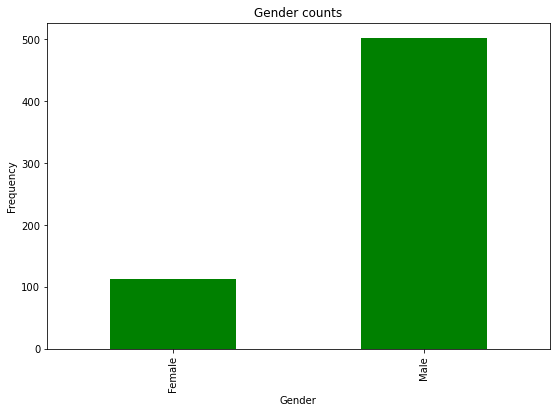

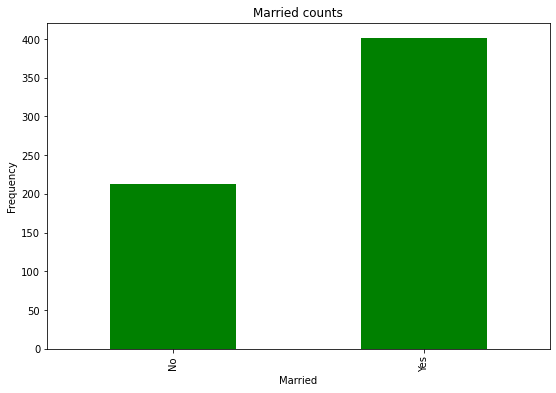

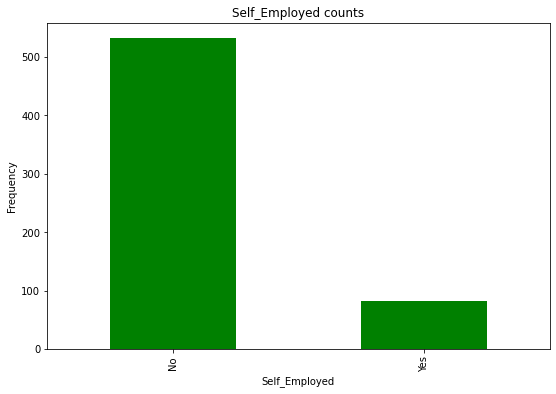

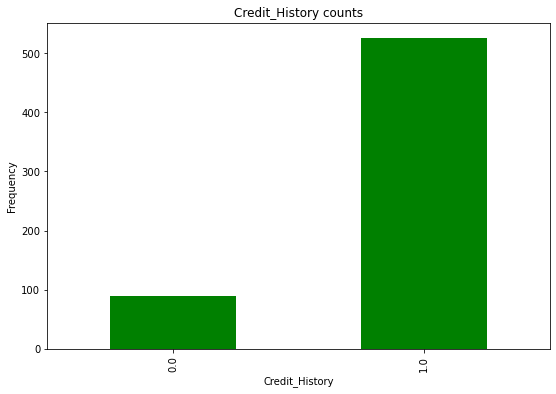

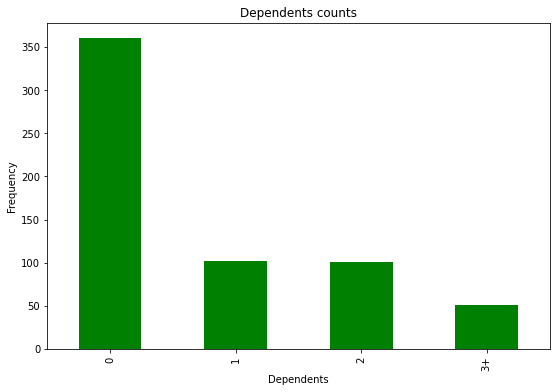

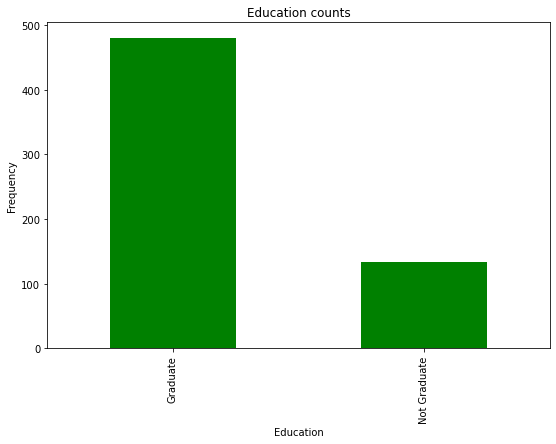

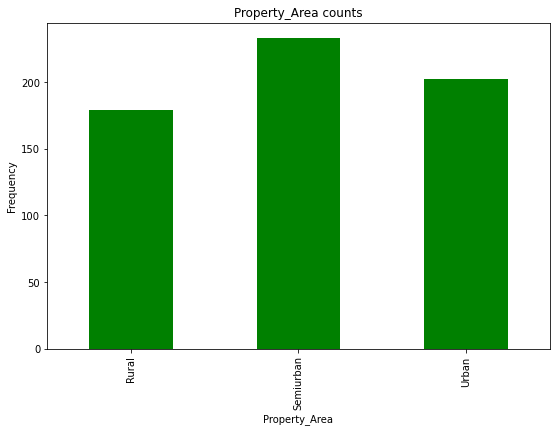

In [30]:
categorical_features = loan_train[["Gender", "Married", "Self_Employed", "Credit_History", "Dependents", "Education", "Property_Area"]]
#plot a bar chart for each categorical feature
for col in categorical_features:
    fig=plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = loan_train[col]
    counts = loan_train[col].value_counts().sort_index()
    counts.plot.bar(ax = ax, color="green")
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


**Univariate Analysis for numeric variables**

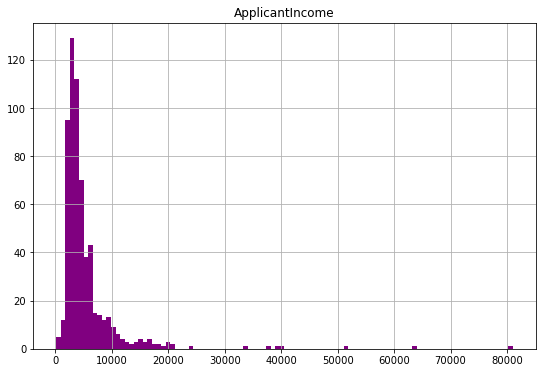

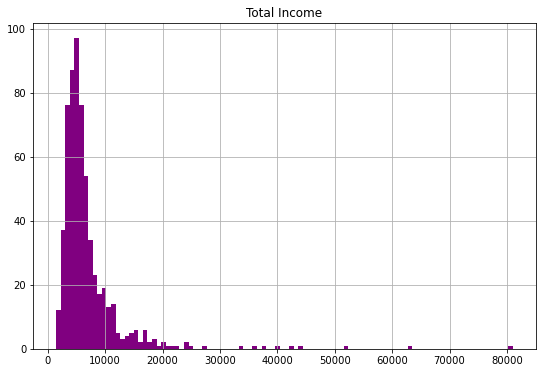

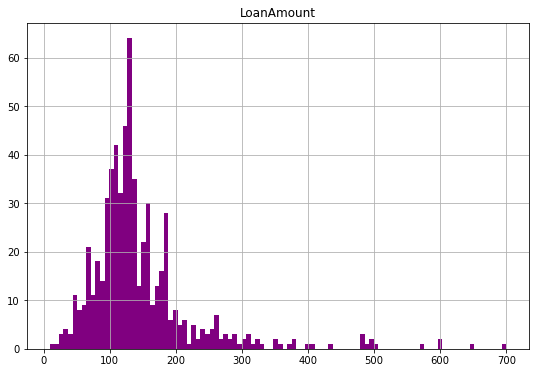

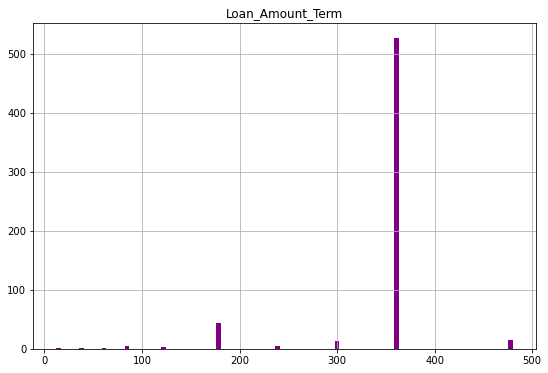

In [35]:
numeric_features = loan_train[["ApplicantIncome", "Total Income", "LoanAmount", "Loan_Amount_Term"]]

# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = loan_train[col]
    feature.hist(bins=100, ax = ax, color="purple")
    ax.set_title(col)
plt.show()


## Bivariate Analysis

Now that we know something about the distribution of the data in our columns, we can start to look for relationships between the features and the loan status label we want to be able to predict.

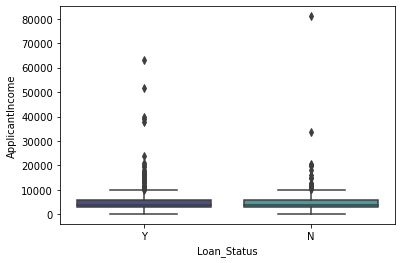

In [36]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=loan_train, palette="mako");